# Notebook Imports

In [78]:
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Gather Data

[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [79]:
boston_dataset = pd.read_csv('housingdata2.csv') # numpy removed boston prices data

In [80]:
boston_dataset #If the datatype is 'bunch' then this will be gibberish

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [81]:
#  dir(boston_dataset)  
''' THIS usually gives different attributes like DESCR , data , feature_names , target 
 These can be accessed by boston_dataset.DESCR'''

' THIS usually gives different attributes like DESCR , data , feature_names , target \n These can be accessed by boston_dataset.DESCR'

## Data exploration with Pandas dataframe

In [82]:
#Our boston_dataset is already a dataframe 

#Create dataframe
#data = pd.DataFrame(data = boston_data.data , columns = boston_data.feature_names)

#Add column with price(target)
#data['PRICE'] = boston_dataset.target

data = boston_dataset

data.rename(columns = {'MEDV' : 'PRICE'} , inplace = True)

In [83]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [84]:
data.head() # first few rows

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2

In [85]:
data.tail() #last few rows

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          B  LSTAT  PRICE  
501  391.99   9.67   22.4  
502  396.90   9.08   20.6  
503  396.90   5.64   23.9  
504  393.45   6.48   22.0  
505  396.90   7.88   11.9

In [86]:
data.count() # show us no. of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - look for missing values

In [87]:
pd.isnull(data) # show miising values FALSE == not missing

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  PRICE  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False  False  False  
..       ...    ...    ...    ...  
501    False  False  False  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]

In [88]:
pd.isnull(data).any() # any missing entry in all attributes?

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [90]:
data = data.astype({'CHAS' : 'float' , 'RAD' : 'float' , 'TAX' : 'float'})

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms , Distributions and Bar Charts

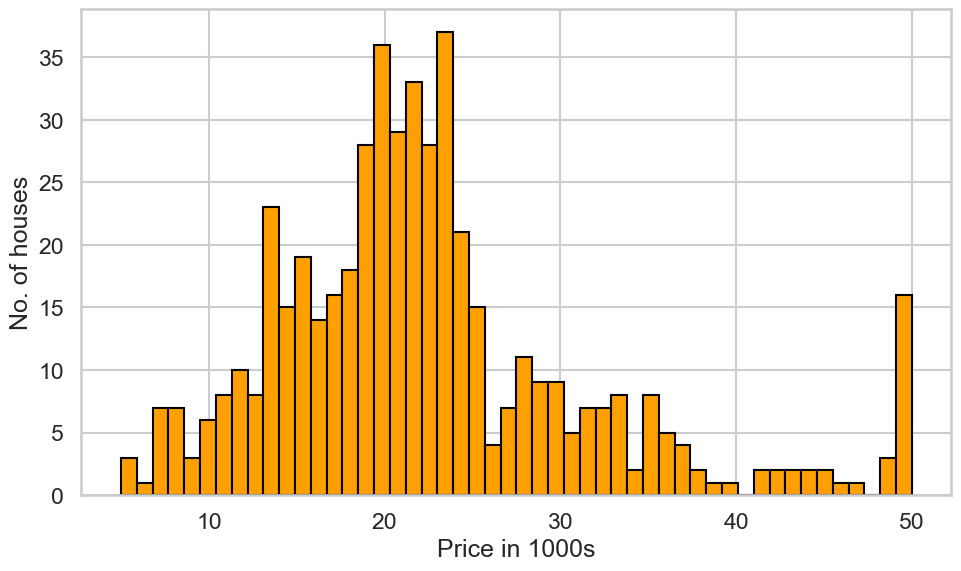

In [92]:
plt.figure(figsize = (10,6))
plt.hist(data['PRICE'] , bins = 50 , ec = 'black' , color = '#FFA000') # color from material pallete hex code
# bins- no. of bars in histogram , ec == edge colour
plt.xlabel('Price in 1000s')
plt.ylabel('No. of houses')
plt.show()

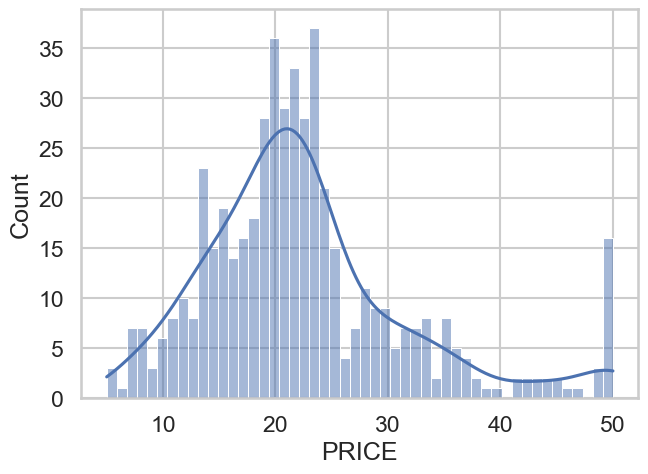

In [93]:
sns.histplot(data['PRICE'] , kde = True , bins = 50  ) # put hist = False to hide histogram
# kde for probability distribution function line
plt.show()

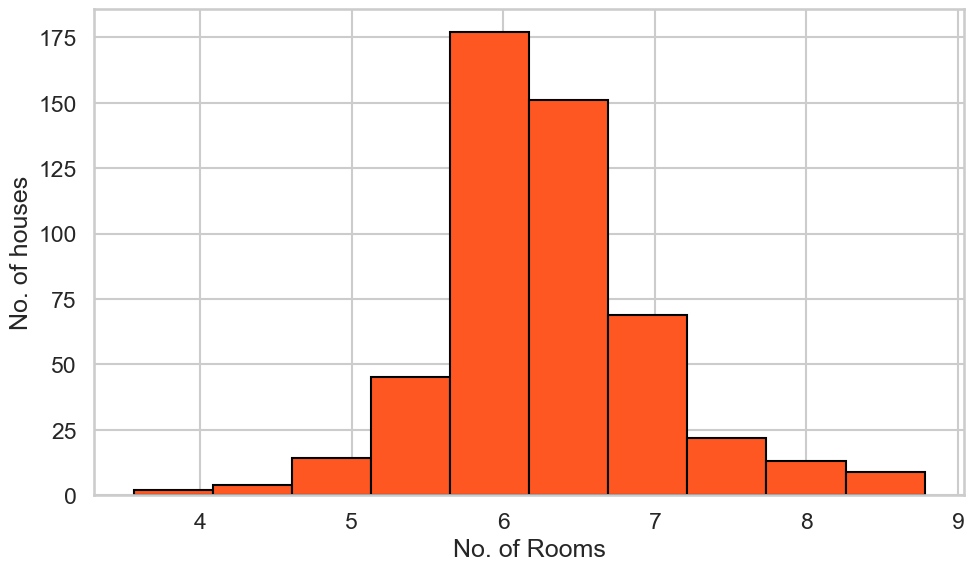

In [94]:
plt.figure(figsize = (10,6))
plt.hist(data['RM'] , ec = 'black' , color = '#FF5722') 
plt.style.use('fivethirtyeight')
plt.xlabel('No. of Rooms')
plt.ylabel('No. of houses')
plt.show()

In [95]:
data['RM'].mean()

6.284634387351779

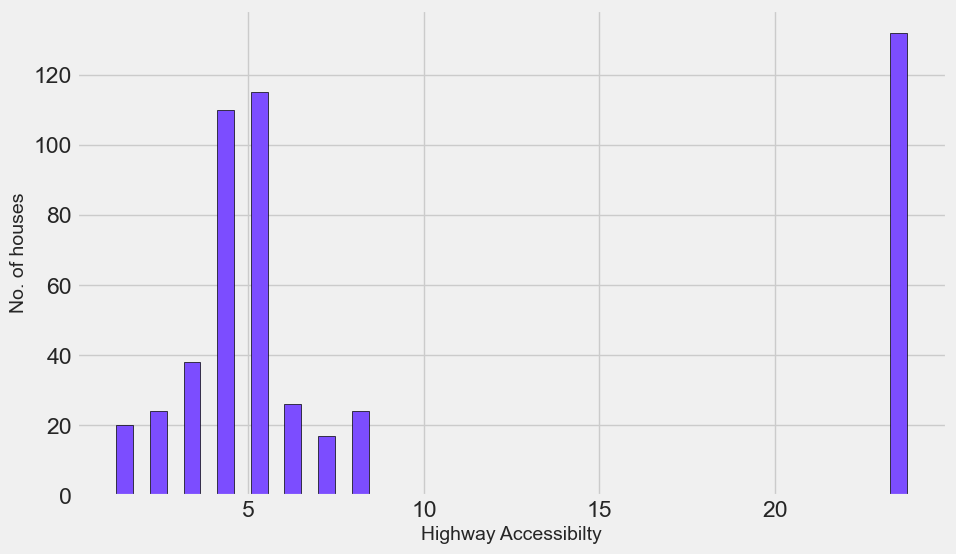

In [96]:
plt.figure(figsize = (10,6))
plt.hist(data['RAD'] , ec = 'black' , color = '#7C4DFF' , bins = 24 , rwidth = 0.5) 
# rwidth to have spaces b/w bars
plt.style.use('fivethirtyeight')
plt.xlabel('Highway Accessibilty')
plt.ylabel('No. of houses')
plt.show()

In [97]:
data['RAD']

0      1.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
501    1.0
502    1.0
503    1.0
504    1.0
505    1.0
Name: RAD, Length: 506, dtype: float64

In [98]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

<class 'pandas.core.series.Series'>
Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')
Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')


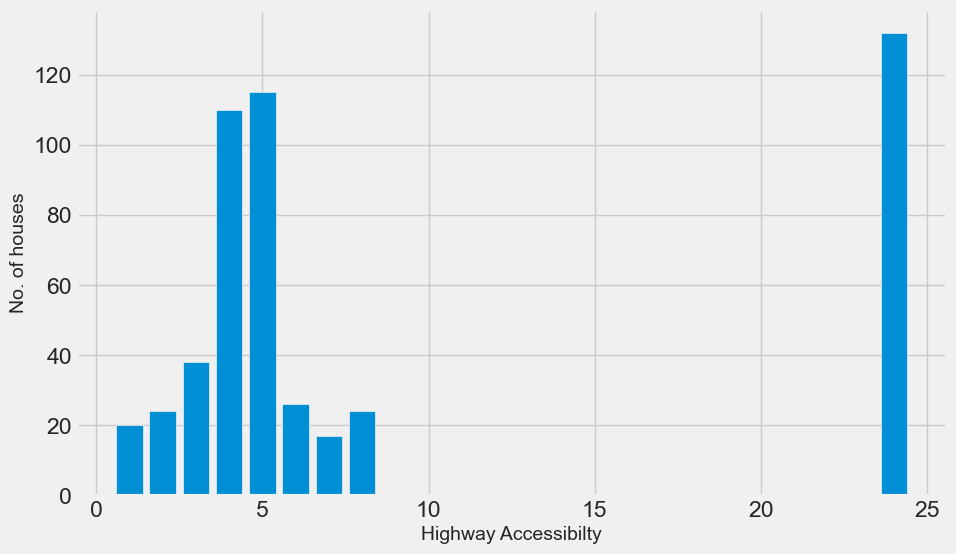

In [99]:
frequency = data['RAD'].value_counts()
# this is better as we dont need to find out there are 24 index..just use value_counts and draw bar graph
print(type(frequency))
print(frequency.index)
print(frequency.axes[0]) # 2 methods to access indices

plt.figure(figsize = (10,6))
plt.xlabel('Highway Accessibilty')
plt.ylabel('No. of houses')
plt.bar(frequency.index , frequency)
plt.show()

In [100]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [101]:
data['PRICE'].min()

5.0

In [102]:
data['PRICE'].max()

50.0

In [103]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [104]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [105]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [106]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [107]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation
## $$ \rho _ {XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho_{XY} \leq +1.0$$

In [108]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [109]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [110]:
data.corr() #Pearson Correlation Coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [111]:
mask = np.zeros_like(data.corr()) # trying make correlation dataframe without duplicate values

In [112]:
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [113]:
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


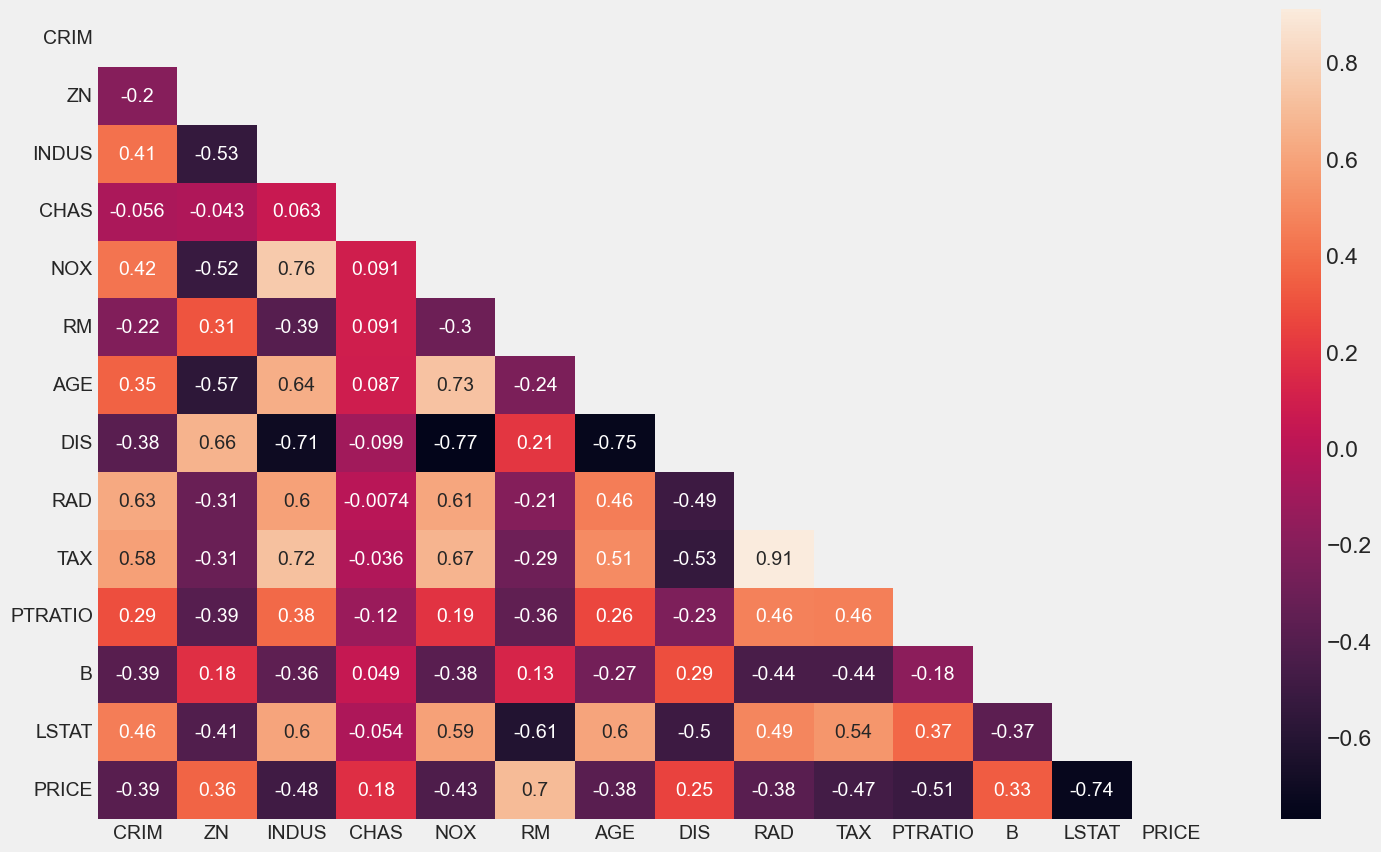

In [114]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr() , mask = mask , annot = True , annot_kws = {'size' : 14})
sns.set_style('white')
plt.grid(False)
# plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

3.555


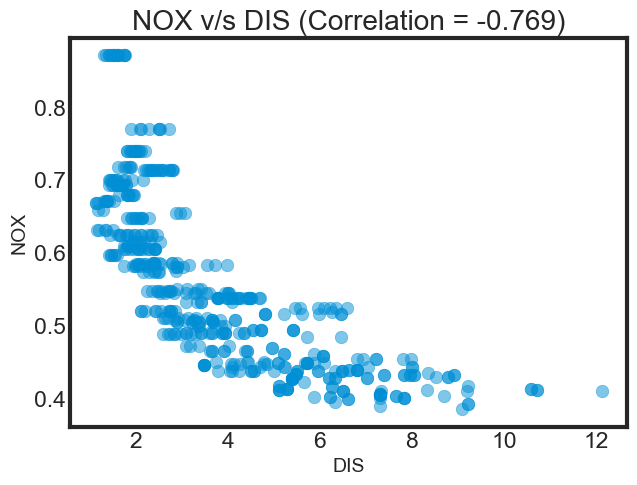

In [115]:
nox_dis_corr = round (data['DIS'].corr(data['NOX']) , 3)
print(round(3.5555 , 3))
plt.scatter(data['DIS'] , data['NOX'] , alpha = 0.5)
plt.title(f'NOX v/s DIS (Correlation = {nox_dis_corr})')
plt.xlabel('DIS')
plt.ylabel('NOX')
plt.show()

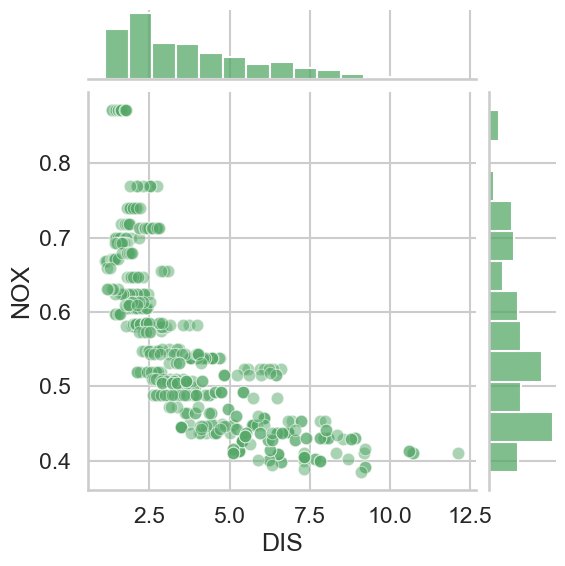

In [116]:
sns.set() #for default sns styling as sns remembers your previous choices hence we need a reset
sns.set_style('whitegrid')
sns.set_context('talk') # helps you set graph for the place where you'll be using it
sns.jointplot(x = data['DIS'] , y = data['NOX'] , color = 'g' , joint_kws = {'alpha' : 0.5})
plt.show()

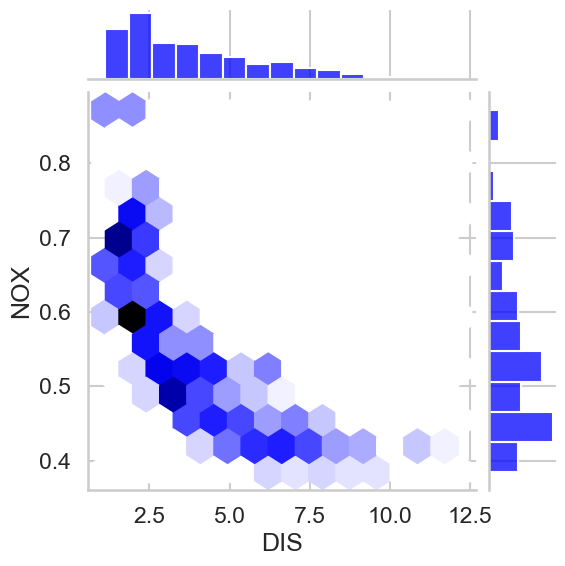

In [117]:
sns.set() #for default sns styling as sns remembers your previous choices hence we need a reset
sns.set_style('whitegrid')
sns.set_context('talk') # helps you set graph for the place where you'll be using it
sns.jointplot(x = data['DIS'] , y = data['NOX'] , kind = 'hex' , color = 'blue' )
plt.show()

### TAX and RAD have a very high corr of 0.91

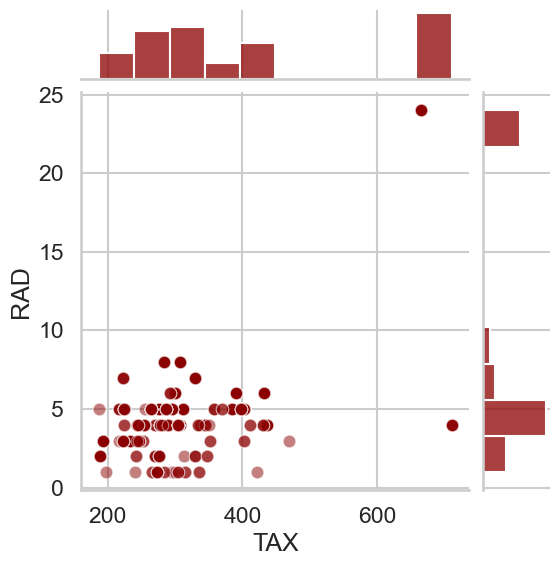

In [118]:
sns.set() #for default sns styling as sns remembers your previous choices hence we need a reset
sns.set_style('whitegrid')
sns.set_context('talk') # helps you set graph for the place where you'll be using it
sns.jointplot(x = data['TAX'] , y = data['RAD'] , color = 'darkred' , joint_kws = {'alpha' : 0.5})
plt.show()

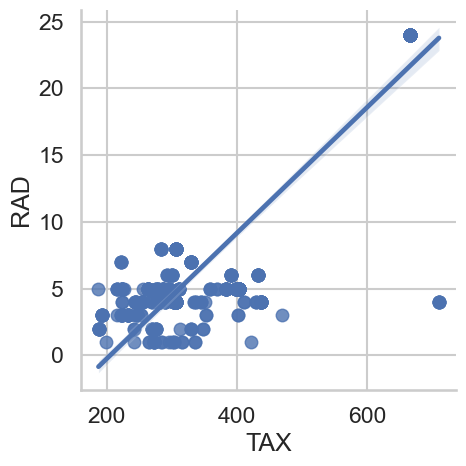

In [119]:
sns.lmplot(x = 'TAX' , y = 'RAD' , data = data  )
plt.show()

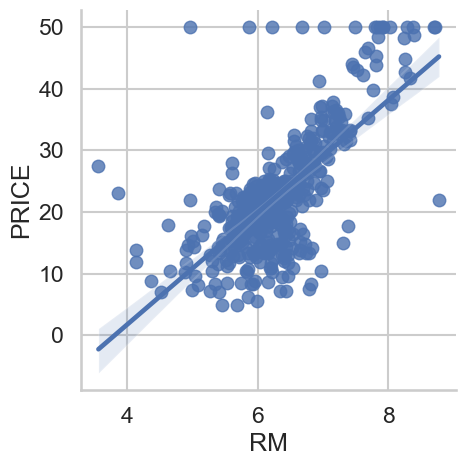

In [120]:
sns.lmplot(x = 'RM' , y = 'PRICE' , data = data  )
plt.show()

In [121]:
# %%time is jupyter specific....gives time taken to run

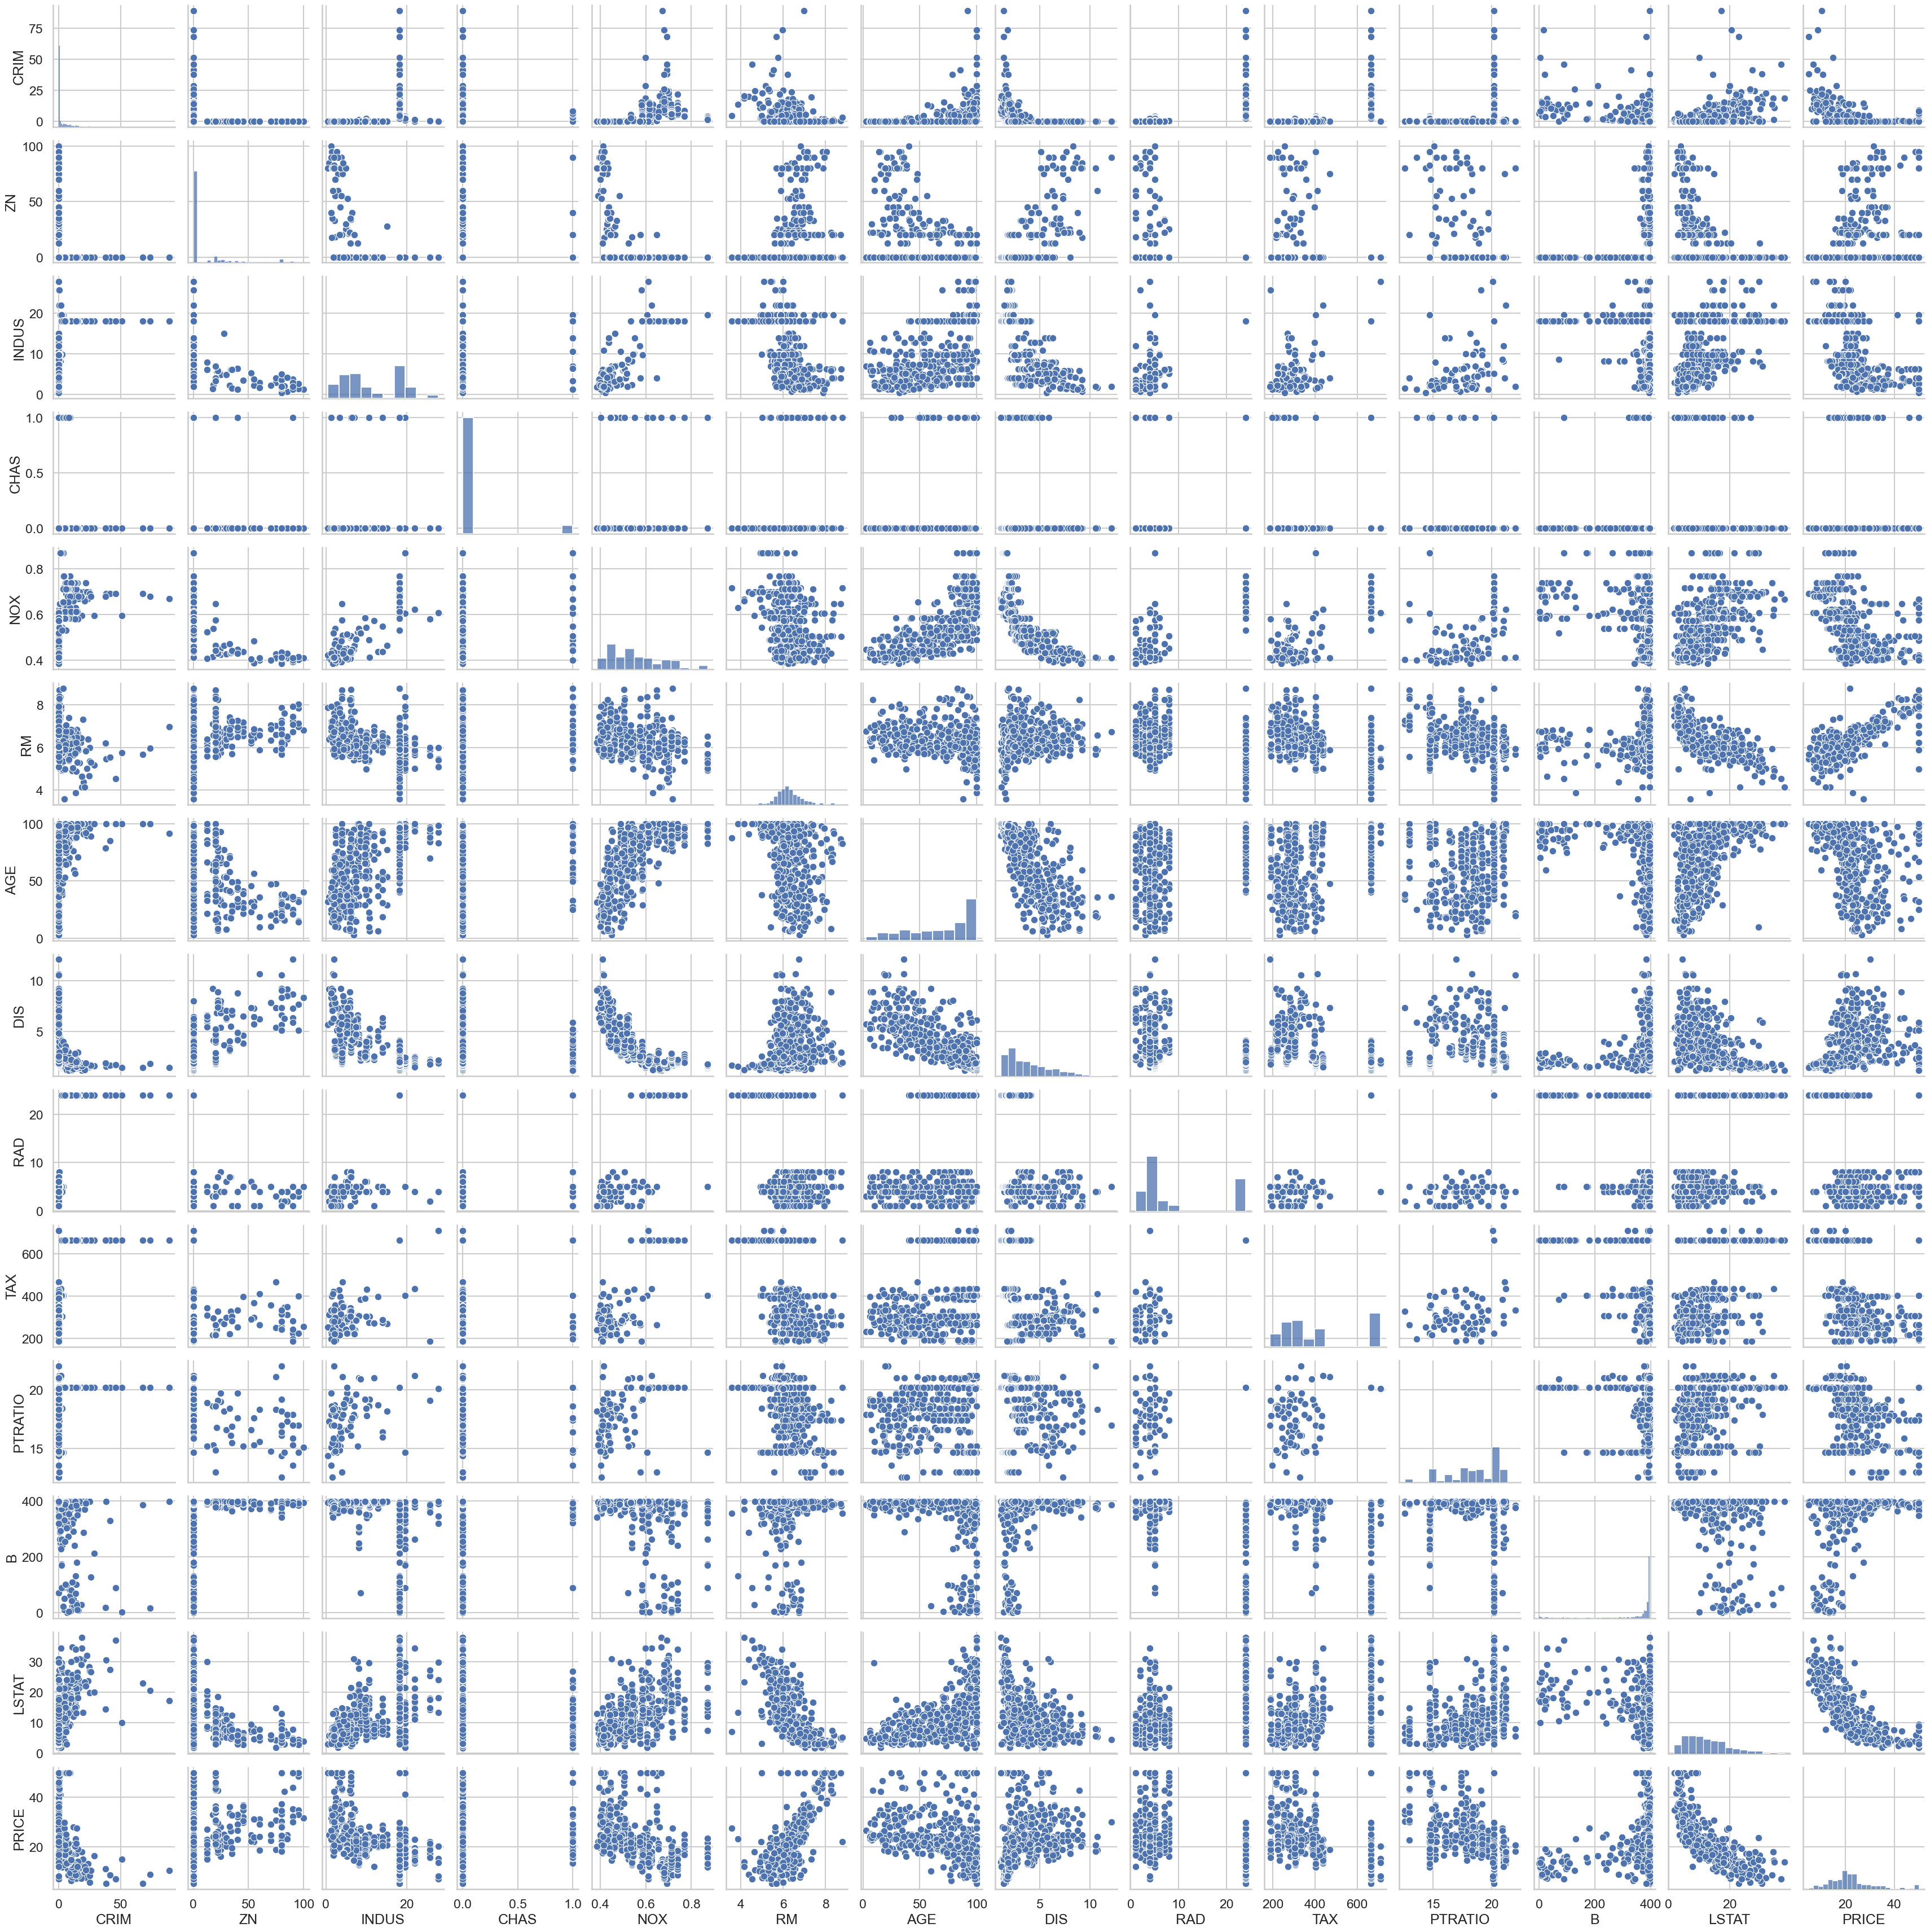

CPU times: total: 32.9 s
Wall time: 53.8 s


In [122]:
%%time
sns.pairplot(data)
plt.show()

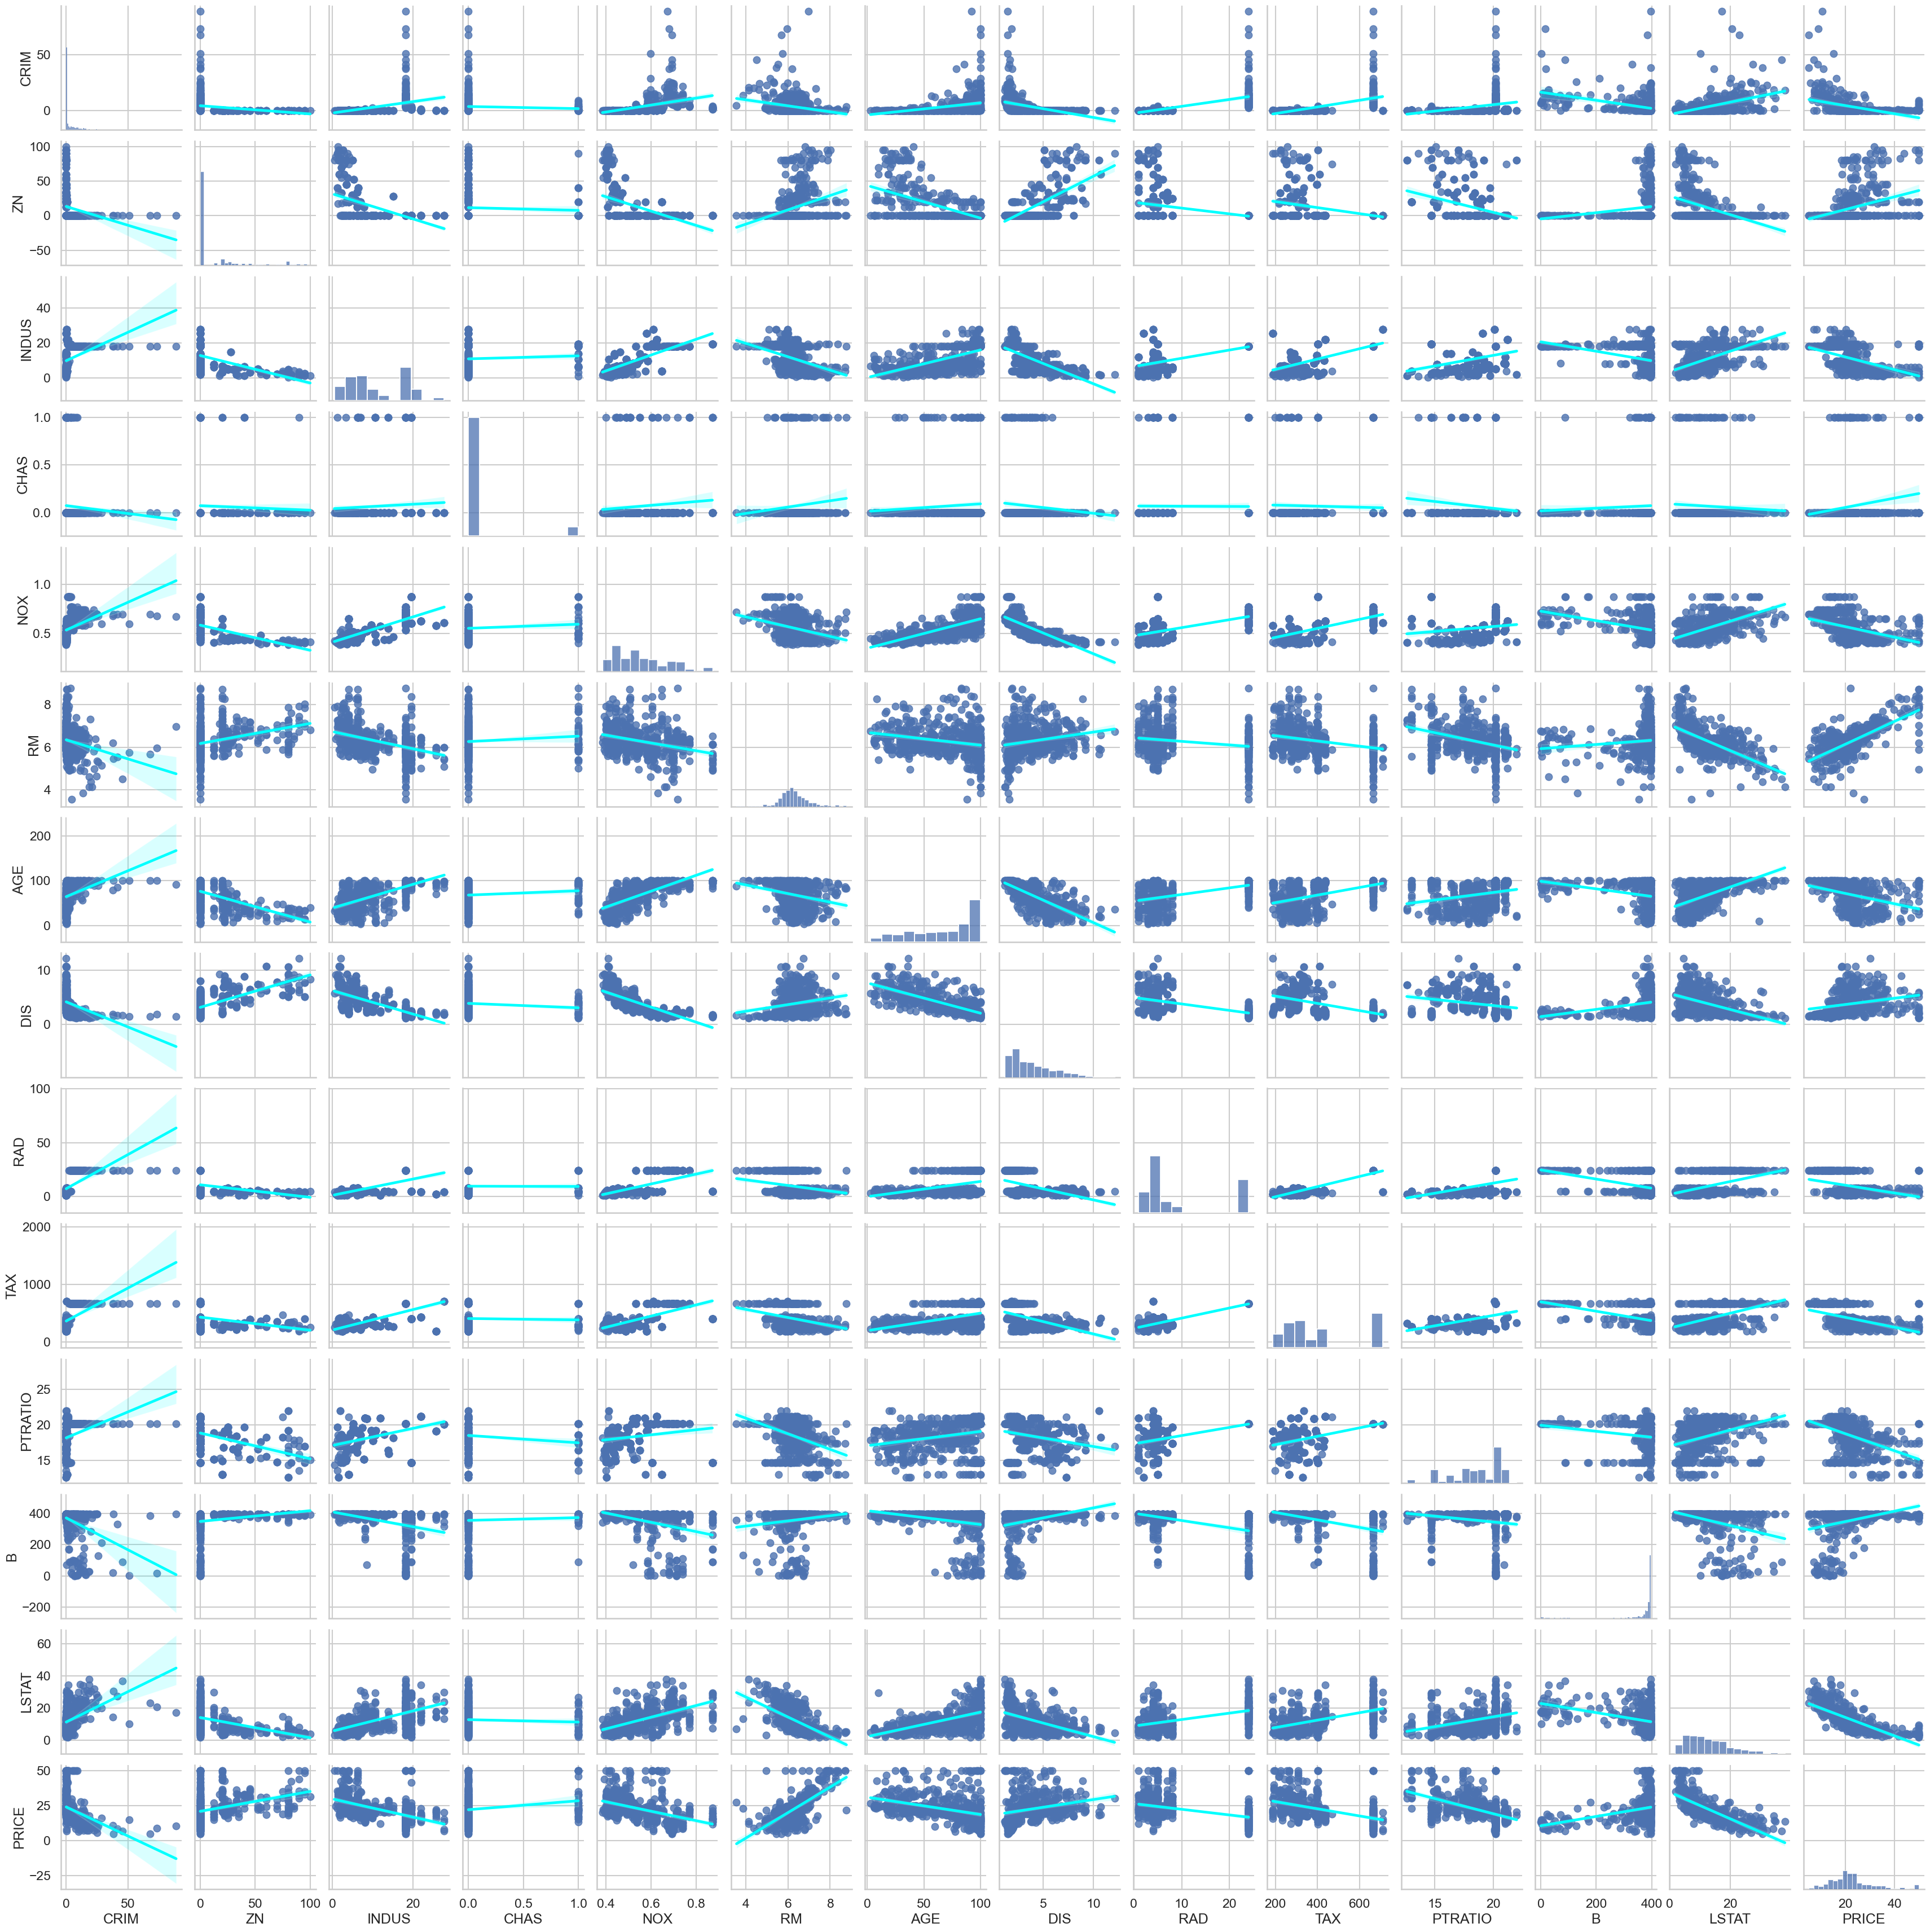

CPU times: total: 3min 16s
Wall time: 2min 48s


In [123]:
%%time
sns.pairplot(data , kind = 'reg' , plot_kws = {'line_kws' : {'color' : 'cyan'}})
plt.show()

## Training and Test Dataset Split

In [124]:
prices = data['PRICE']
features = data.drop('PRICE' , axis = 1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10)
    
len(X_train)/len(features)
len(X_test)/len(features)

0.2015810276679842

## Multivariable Regression

In [125]:
regr = LinearRegression()
regr.fit(X_train , y_train)

print('Training' , regr.score(X_train , y_train))
print('Testing' , regr.score(X_test , y_test))

print('Interecept' , regr.intercept_)
pd.DataFrame(data = regr.coef_ , index = X_train.columns , columns = ['coefficient'])

Training 0.750121534530608
Testing 0.6709339839115628
Interecept 36.53305138282439


coefficient
CRIM       -0.128181
ZN          0.063198
INDUS      -0.007576
CHAS        1.974515
NOX       -16.271989
RM          3.108456
AGE         0.016292
DIS        -1.483014
RAD         0.303988
TAX        -0.012082
PTRATIO    -0.820306
B           0.011419
LSTAT      -0.581626

## Data Transformations

In [126]:
data['PRICE'].skew() # look at the histogram..there is unusual spike at high prices..i.e there is skew

1.1080984082549072

In [127]:
y_log = np.log(data['PRICE']) # using log transformation
y_log

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

In [128]:
y_log.skew() #better skew

-0.33032129530987864

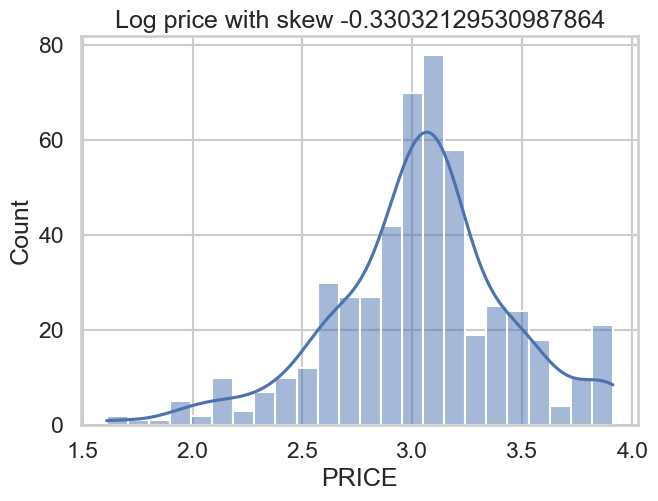

In [129]:
sns.histplot(y_log , kde = True)
sns.set_style()
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

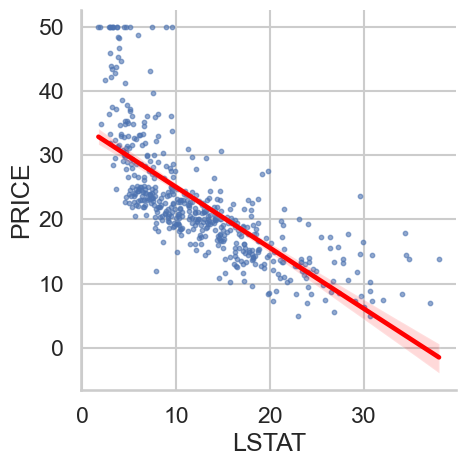

In [130]:
sns.lmplot(x = 'LSTAT' , y = 'PRICE' , data = data , scatter_kws = {'alpha': 0.6 , 's' : 10} , line_kws = {'color' : 'red'})
plt.show()

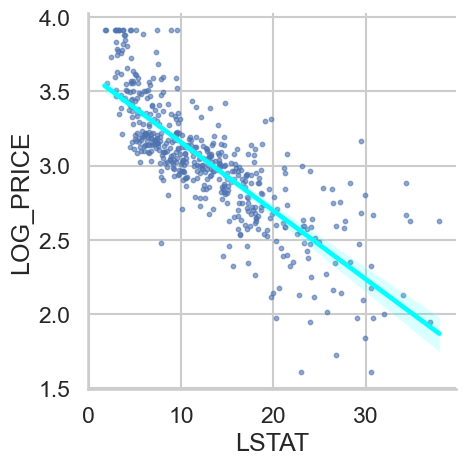

In [131]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x = 'LSTAT' , y = 'LOG_PRICE' , data = transformed_data ,
           scatter_kws = {'alpha': 0.6 , 's' : 10} , line_kws = {'color' : 'cyan'})
plt.show()

## Regression using log prices

In [132]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE' , axis = 1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10)
    
regr = LinearRegression()
regr.fit(X_train , y_train)

print('Training' , regr.score(X_train , y_train))
print('Testing' , regr.score(X_test , y_test))

print('Interecept' , regr.intercept_)
pd.DataFrame(data = regr.coef_ , index = X_train.columns , columns = ['coefficient'])

Training 0.7930234826697583
Testing 0.7446922306260724
Interecept 4.05994387177519


coefficient
CRIM       -0.010672
ZN          0.001579
INDUS       0.002030
CHAS        0.080331
NOX        -0.704068
RM          0.073404
AGE         0.000763
DIS        -0.047633
RAD         0.014565
TAX        -0.000645
PTRATIO    -0.034795
B           0.000516
LSTAT      -0.031390

#### Much better r-squared now

In [133]:
# Charles river property premium
np.e**0.080331

1.0836456950439142

## p-values and Evaluating Coefficients (using statsmodels)

In [134]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train , X_incl_const) #Ordinary Least Squares -- Regression 
results = model.fit()

results.params # r-squared
# print(X_incl_const)

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [135]:
results.pvalues

const      1.188124e-52
CRIM       1.753774e-14
ZN         8.607727e-03
INDUS      4.445368e-01
CHAS       3.824015e-02
NOX        2.729624e-05
RM         1.089112e-04
AGE        2.091731e-01
DIS        1.812912e-07
RAD        3.746363e-07
TAX        5.145680e-05
PTRATIO    7.549821e-09
B          6.326839e-06
LSTAT      3.105305e-37
dtype: float64

In [136]:
pd.DataFrame({'coef' : results.params , 'p-values' : round(results.pvalues , 3)})
# features with p-value > 0.05 are insignificant

coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + .... + \alpha _{12} LSTAT $$

$$ VIF_{TAX} = \frac{1}{1 - R_{TAX}^2} $$

### VIF = Variance Inflation Factor
#### If VIF>10 then problem

In [137]:
vif(exog = X_incl_const, exog_idx = 1 )

1.7145250443932485

In [138]:
vif_list = []

for i in range(X_incl_const.shape[1]):
    vif_list.append(vif(exog = X_incl_const, exog_idx = i ))
    
print(vif_list)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [139]:
vif_list = [vif(exog = X_incl_const, exog_idx = i ) 
           for i in range(X_incl_const.shape[1])]
    
pd.DataFrame({'coef_name' : X_incl_const.columns , 'vif': np.round(vif_list , 3)})
# keep vif threshhold 10

coef_name      vif
0      const  597.549
1       CRIM    1.715
2         ZN    2.333
3      INDUS    3.943
4       CHAS    1.079
5        NOX    4.410
6         RM    1.840
7        AGE    3.327
8        DIS    4.223
9        RAD    7.314
10       TAX    8.509
11   PTRATIO    1.840
12         B    1.339
13     LSTAT    2.813

## Models Simplification and the Baysian Information Criterion(BIC)
#### Use the model with the least BIC

In [140]:
#Original Model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train , X_incl_const) 
results = model.fit()

org_coef = pd.DataFrame({'coef' : results.params , 'p-values' : round(results.pvalues , 3)})
print(results.bic)
print(results.rsquared)

-139.74997769478875
0.7930234826697582


In [141]:
#Original Model #1 excluding INDUS cuz of p-value

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'] , axis = 1)

model = sm.OLS(y_train , X_incl_const) 
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef' : results.params , 'p-values' : round(results.pvalues , 3)})
print(results.bic)
print(results.rsquared)

-145.14508855591163
0.7927126289415163


In [142]:
#Original Model #1 excluding INDUS & #2 excluding AGE cuz of p-value

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS' , 'AGE'] , axis = 1)

model = sm.OLS(y_train , X_incl_const) 
results = model.fit()

reduced_coef = pd.DataFrame({'coef' : results.params , 'p-values' : round(results.pvalues , 3)})

print(results.bic)
print(results.rsquared)

-149.49934294224656
0.7918657661852815


In [143]:
frames = [org_coef , coef_minus_indus , reduced_coef]
pd.concat(frames , axis = 1)

coef  p-values      coef  p-values      coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

## Residuals and Residual Plots

0.8898683982394705


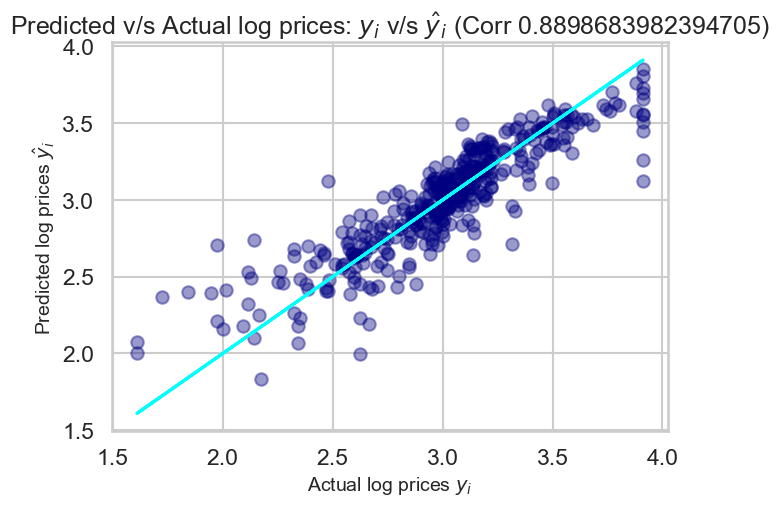

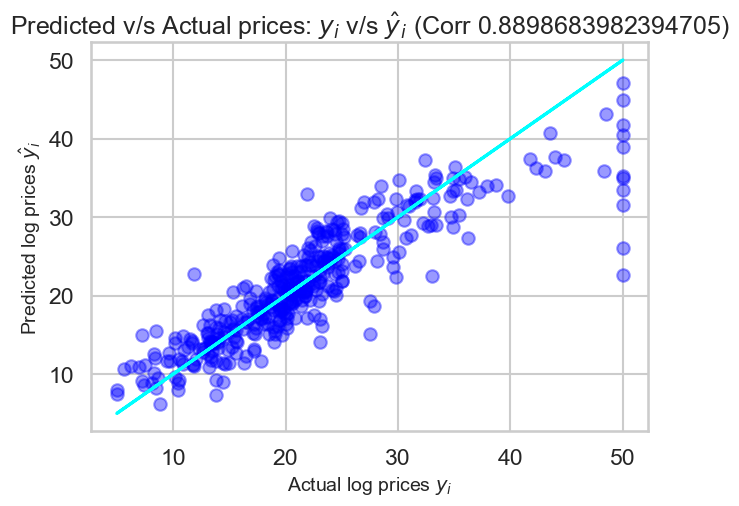

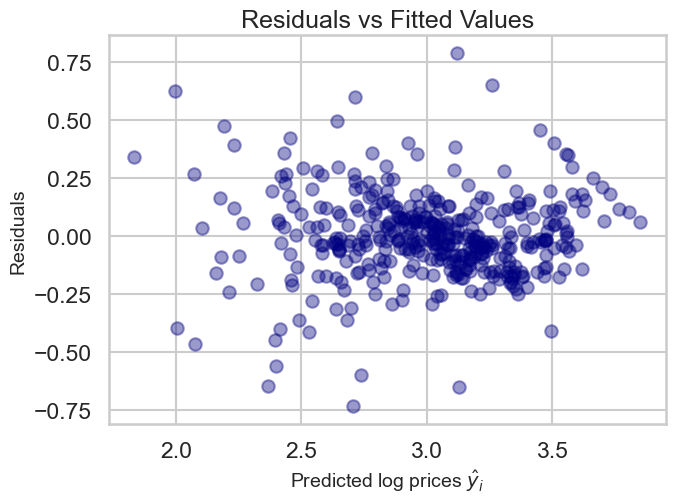

In [144]:
#Modeified model : transformed (using log prices) & simplified (dropping 2 variables)

prices = np.log(data['PRICE'])
features = data.drop(['PRICE' , 'INDUS' , 'AGE'] , axis = 1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10)
    
#Using Statsmodel

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train , X_incl_const) 
results = model.fit()

#Residuals
# residuals = y_train - results.fittedvalues
# results.resid  BOTH MESTHODS ARE SAME

# Graph of Actual vs. Predicted Prices
corr = y_train.corr(results.fittedvalues)
print(corr)

plt.scatter(y_train , results.fittedvalues , c = 'navy' , alpha = 0.4)
plt.plot(y_train , y_train , c = 'cyan') #y=x line depicting perfect prediction
plt.xlabel('Actual log prices $y_i$' , fontsize = 14) # LaTeX notation in labels
plt.ylabel('Predicted log prices $\hat y_i$' , fontsize = 14)
plt.title(f'Predicted v/s Actual log prices: $y_i$ v/s $\hat y_i$ (Corr {corr})')

plt.show()

plt.scatter(np.e**y_train , np.e**results.fittedvalues , c = 'blue' , alpha = 0.4)
plt.plot(np.e**y_train , np.e**y_train , c = 'cyan') #y=x line depicting perfect prediction
plt.xlabel('Actual log prices $y_i$' , fontsize = 14) # LaTeX notation in labels
plt.ylabel('Predicted log prices $\hat y_i$' , fontsize = 14)
plt.title(f'Predicted v/s Actual prices: $y_i$ v/s $\hat y_i$ (Corr {corr})')

plt.show()

# Residuals vs Predicted Values

plt.scatter(results.fittedvalues , results.resid , c = 'navy' , alpha = 0.4)
# plt.plot(np.e**y_train , np.e**y_train , c = 'cyan') #y=x line depicting perfect prediction
plt.xlabel('Predicted log prices $\hat y_i$' , fontsize = 14) # LaTeX notation in labels
plt.ylabel('Residuals' , fontsize = 14)
plt.title('Residuals vs Fitted Values')

plt.show()

# Mean Squared Error and R-Squared
reduced_log_mse = round(results.mse_resid , 3)
reduced_log_rsquared = round(results.rsquared , 3)

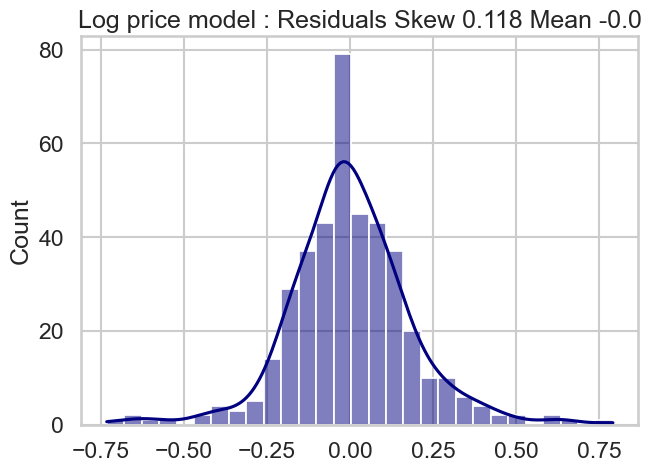

In [145]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean() , 3)
resid_skew = round(results.resid.skew() , 3)

sns.histplot(results.resid , color = 'navy' , kde = True)
plt.title(f'Log price model : Residuals Skew {resid_skew} Mean {resid_mean}')
plt.show()

0.8660955689360199


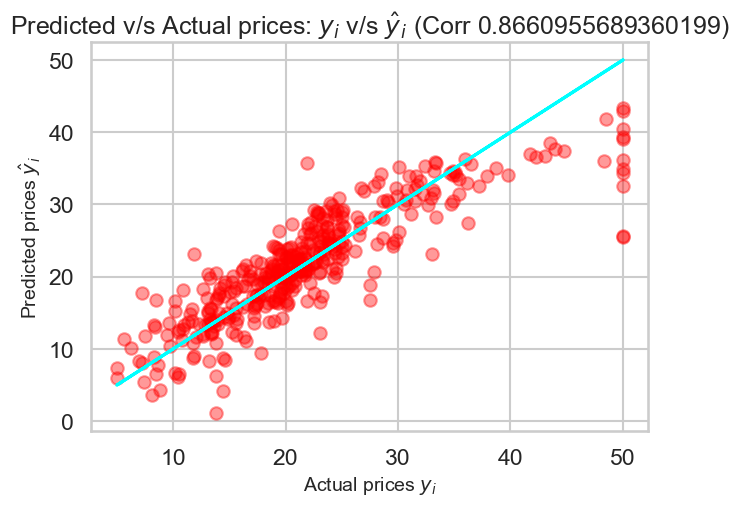

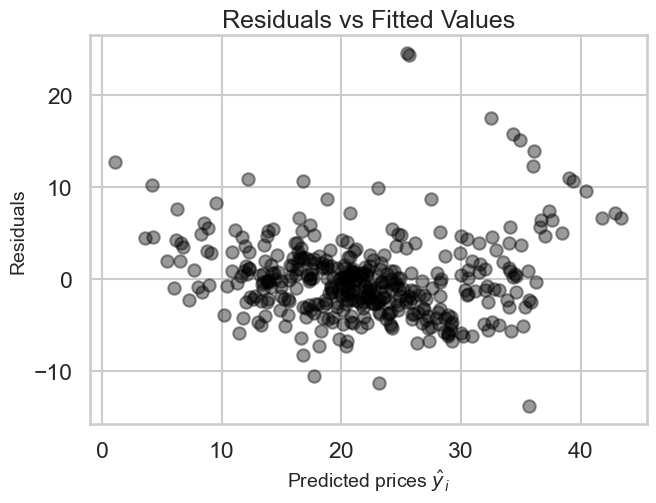

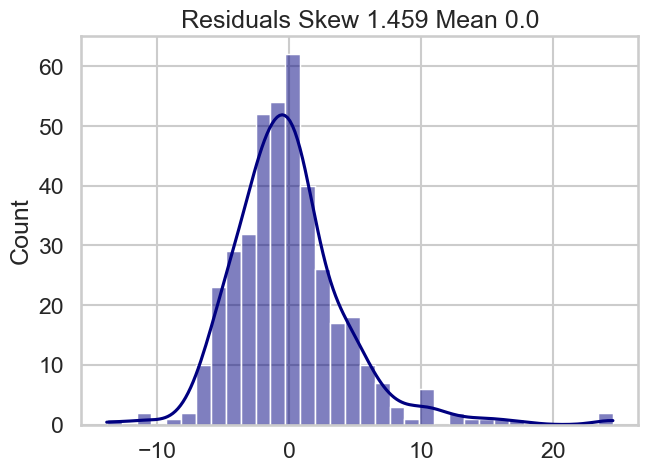

In [146]:
#Original Model: normal prices and all features

prices = data['PRICE']
features = data.drop(['PRICE'] , axis = 1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10)
    
#Using Statsmodel

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train , X_incl_const) 
results = model.fit()

#Residuals
# residuals = y_train - results.fittedvalues
# results.resid  BOTH MESTHODS ARE SAME

# Graph of Actual vs. Predicted Prices
corr = y_train.corr(results.fittedvalues)
print(corr)

plt.scatter(y_train , results.fittedvalues , c = 'red' , alpha = 0.4)
plt.plot(y_train , y_train , c = 'cyan') #y=x line depicting perfect prediction
plt.xlabel('Actual prices $y_i$' , fontsize = 14) # LaTeX notation in labels
plt.ylabel('Predicted prices $\hat y_i$' , fontsize = 14)
plt.title(f'Predicted v/s Actual prices: $y_i$ v/s $\hat y_i$ (Corr {corr})')

plt.show()

plt.scatter(results.fittedvalues , results.resid , c = 'black' , alpha = 0.4)
plt.xlabel('Predicted prices $\hat y_i$' , fontsize = 14) # LaTeX notation in labels
plt.ylabel('Residuals' , fontsize = 14)
plt.title('Residuals vs Fitted Values')

plt.show()

# Distribution of Residuals - checking for normality
resid_mean = round(results.resid.mean() , 3)
resid_skew = round(results.resid.skew() , 3)

sns.histplot(results.resid , color = 'navy' , kde = True)
plt.title(f'Residuals Skew {resid_skew} Mean {resid_mean}')
plt.show()

# Mean Squared Error and R-Squared
full_normal_mse = round(results.mse_resid , 3)
full_normal_rsquared = round(results.rsquared , 3)

0.6782035673125669


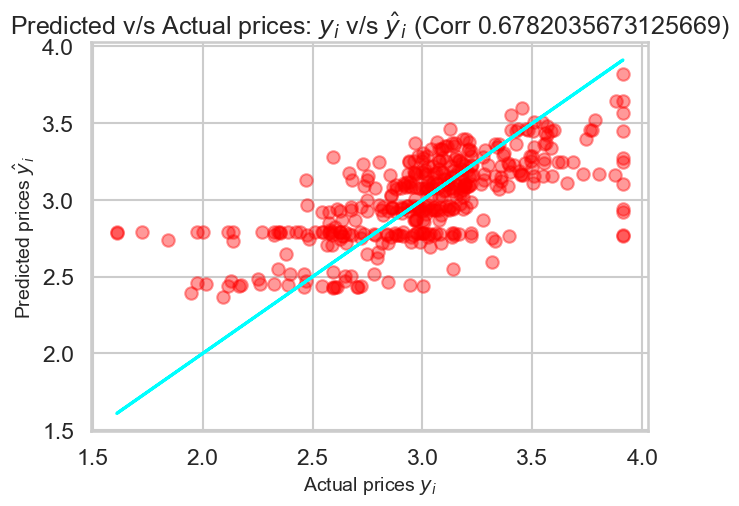

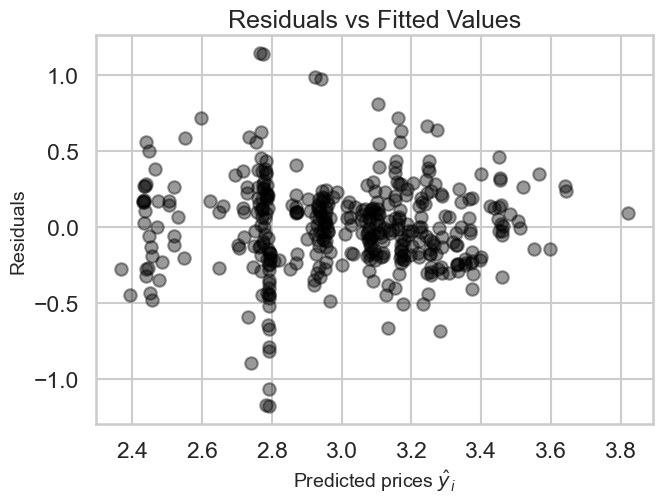

We can see bands being formed and not a perfectly random distribution


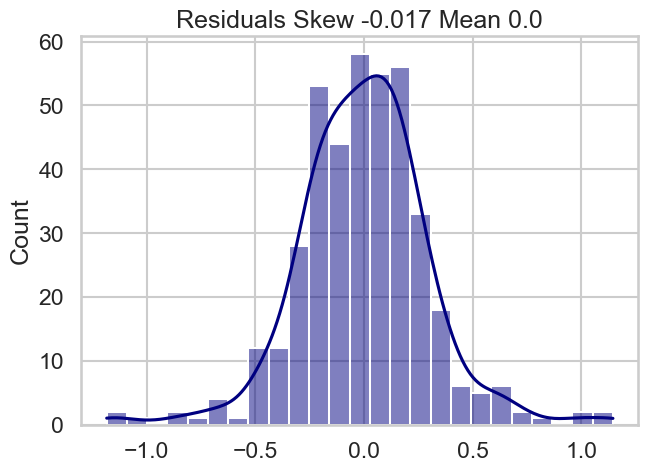

In [147]:
#Model missing key features: log prices

prices = np.log(data['PRICE'])
features = data.drop(['PRICE' , 'INDUS' , 'AGE' , 'LSTAT' , 'RM' , 'NOX' , 'CRIM'] , axis = 1)

X_train , X_test , y_train , y_test = train_test_split(features , prices , test_size = 0.2 , random_state = 10)
    
#Using Statsmodel

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train , X_incl_const) 
results = model.fit()

#Residuals
# residuals = y_train - results.fittedvalues
# results.resid  BOTH MESTHODS ARE SAME

# Graph of Actual vs. Predicted Prices
corr = y_train.corr(results.fittedvalues)
print(corr)

plt.scatter(y_train , results.fittedvalues , c = 'red' , alpha = 0.4)
plt.plot(y_train , y_train , c = 'cyan') #y=x line depicting perfect prediction
plt.xlabel('Actual prices $y_i$' , fontsize = 14) # LaTeX notation in labels
plt.ylabel('Predicted prices $\hat y_i$' , fontsize = 14)
plt.title(f'Predicted v/s Actual prices: $y_i$ v/s $\hat y_i$ (Corr {corr})')

plt.show()

plt.scatter(results.fittedvalues , results.resid , c = 'black' , alpha = 0.4)
plt.xlabel('Predicted prices $\hat y_i$' , fontsize = 14) # LaTeX notation in labels
plt.ylabel('Residuals' , fontsize = 14)
plt.title('Residuals vs Fitted Values')

plt.show()
print('We can see bands being formed and not a perfectly random distribution')

# Distribution of Residuals - checking for normality
resid_mean = round(results.resid.mean() , 3)
resid_skew = round(results.resid.skew() , 3)

sns.histplot(results.resid , color = 'navy' , kde = True)
plt.title(f'Residuals Skew {resid_skew} Mean {resid_mean}')
plt.show()

# Mean Squared Error and R-Squared
omitted_var_mse = round(results.mse_resid , 3)
omitted_var_rsquared = round(results.rsquared , 3)

In [148]:
pd.DataFrame({'R-Squared' : [reduced_log_rsquared , full_normal_rsquared , omitted_var_rsquared] , 
             'MSE' : [reduced_log_mse , full_normal_mse , omitted_var_mse],
             'RMSE' : np.sqrt([reduced_log_mse , full_normal_mse , omitted_var_mse])} , 
            index = ['Reduced Log Model' , 'Full Normal Price Model' , 'Omitted Var Model'])

R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295
Omitted Var Model            0.460   0.090  0.300000

In [149]:
# SUppose our predicted house price is $30.000 then give a range of prediction
# our range is 2 Standard Deviations
# 1 std dev = rmse

print('2 s.d in log prices is' , 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
# we use log(30) and not 30,000 cuz our model is in 1000s
print('the upper bound in log prices for 95% prediction interval is' , upper_bound)
print('the upper bound in normal prices is' ,(np.e**upper_bound)*1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('the lower bound in log prices for 95% prediction interval is' , lower_bound)
print('the lower bound in normal prices is' ,(np.e**lower_bound)*1000)

2 s.d in log prices is 0.37416573867739417
the upper bound in log prices for 95% prediction interval is 3.7753631203395495
the upper bound in normal prices is 43613.34233239937
the lower bound in log prices for 95% prediction interval is 3.0270316429847615
the lower bound in normal prices is 20635.886906824155
